## Import & Drive Mount

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import re

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
keras.__version__

'2.4.3'

In [ ]:
from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing

In [ ]:
!unzip /content/drive/My\ Drive/[양재]\ 1조/dataset/emotion_kaggle_modify.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: data/train/sad/Image01220.png  
  inflating: data/train/sad/Image01274.png  
  inflating: data/train/sad/Image01279.png  
  inflating: data/train/sad/Image01286.png  
  inflating: data/train/sad/Image01289.png  
  inflating: data/train/sad/Image01310.png  
  inflating: data/train/sad/Image01336.png  
  inflating: data/train/sad/Image01386.png  
  inflating: data/train/sad/Image01395.png  
  inflating: data/train/sad/Image01415.png  
  inflating: data/train/sad/Image01425.png  
  inflating: data/train/sad/Image01508.png  
  inflating: data/train/sad/Image01529.png  
  inflating: data/train/sad/Image01532.png  
  inflating: data/train/sad/Image01580.png  
  inflating: data/train/sad/Image01584.png  
  inflating: data/train/sad/Image01603.png  
  inflating: data/train/sad/Image01612.png  
  inflating: data/train/sad/Image01645.png  
  inflating: data/train/sad/Image01678.png  
  inflating: data/train/sad/Image01743.png  
  inflating: data/t

### data root 설정

In [ ]:
data_root_dir = 'data'
os.listdir(data_root_dir)

['train', 'valid']

In [ ]:
dir_names = [data_root_dir + child for child in ['/train/angry', '/train/happy', '/train/neutral', '/train/sad', '/valid/angry', '/valid/happy', '/valid/neutral', '/valid/sad']]


In [ ]:
# 확장자 명 확인
for check_dir in dir_names :
    print(f'- In "{check_dir}" directory : {os.listdir(check_dir)[:3]}')

- In "data/train/angry" directory : ['1385m.jpg', '2682m.jpg', '2024m.jpg']
- In "data/train/happy" directory : ['9168m.jpg', '7040m.jpg', '5311m.jpg']
- In "data/train/neutral" directory : ['13760m.jpg', '11748m.jpg', '12422m.jpg']
- In "data/train/sad" directory : ['16680m.jpg', '14761m.jpg', '16420m.jpg']
- In "data/valid/angry" directory : ['18928m.jpg', '18909m.jpg', '18734m.jpg']
- In "data/valid/happy" directory : ['20290m.jpg', '20749m.jpg', '21252m.jpg']
- In "data/valid/neutral" directory : ['21752m.jpg', '21936m.jpg', '21719m.jpg']
- In "data/valid/sad" directory : ['22608m.jpg', '22712m.jpg', '22779m.jpg']


In [ ]:
train_dir = data_root_dir + '/train'
valid_dir = data_root_dir + '/valid'

print(f'- Train Directory : {train_dir}')
print(f'- Valid Directory  : {valid_dir}')

- Train Directory : data/train
- Valid Directory  : data/valid


In [ ]:
#데이터 개수 확인
train_angry_dir = train_dir + '/angry'
train_happy_dir = train_dir + '/happy'
train_neutral_dir = train_dir + '/neutral'
train_sad_dir = train_dir + '/sad'
valid_angry_dir = valid_dir + '/angry'
valid_happy_dir = valid_dir + '/happy'
valid_neutral_dir = valid_dir + '/neutral'
valid_sad_dir = valid_dir + '/sad'

print('* Train angry Data')
print(f'==> {len(os.listdir(train_angry_dir))}')

print('\n* Train happy Data')
print(f'==> {len(os.listdir(train_happy_dir))}')

print('* Train neutral Data')
print(f'==> {len(os.listdir(train_neutral_dir))}')

print('\n* Train sad Data')
print(f'==> {len(os.listdir(train_sad_dir))}')

print('\n* Validation angry Data')
print(f'==> {len(os.listdir(valid_angry_dir))}')

print('\n* Validation happy Data')
print(f'==> {len(os.listdir(valid_happy_dir))}')

print('\n* Validation neutral Data')
print(f'==> {len(os.listdir(valid_neutral_dir))}')

print('\n* Validation sad Data')
print(f'==> {len(os.listdir(valid_sad_dir))}')

* Train angry Data
==> 3563

* Train happy Data
==> 6685
* Train neutral Data
==> 4349

* Train sad Data
==> 4129

* Validation angry Data
==> 904

* Validation happy Data
==> 1733

* Validation neutral Data
==> 1059

* Validation sad Data
==> 1152


In [ ]:
#train data시각화 (0 : angry / 1 : happy / 2 : neutral / 3 : sad)
images = train_data[0][0][:9]
labels = train_data[0][1][:9]

plt.figure(figsize = (10,10))

for i in range(9) :
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis(False)

plt.show()

### Generate Data

In [ ]:
#이미지 증강
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale = 1./255,
                               rotation_range=90,
                               horizontal_flip = True,
                               vertical_flip = True
                               )


valid_gen = ImageDataGenerator(rescale = 1./255)


train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (48,48),
                                           batch_size = 100,
                                           class_mode = 'categorical')

valid_data = valid_gen.flow_from_directory(valid_dir,
                                         target_size = (48,48),
                                         batch_size = 100,
                                         shuffle = False,
                                         class_mode = 'categorical')

Found 18726 images belonging to 4 classes.
Found 4848 images belonging to 4 classes.


In [ ]:
print(f'- Train data : {len(train_data):4d} batches')
print(f'- Valid data  : {len(valid_data):4d} batches')

- Train data :  188 batches
- Valid data  :   49 batches


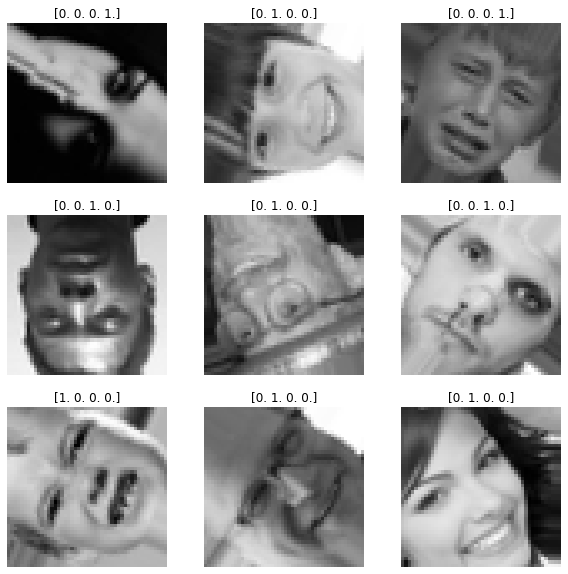

In [ ]:
#train data시각화 
images = train_data[0][0][:9]
labels = train_data[0][1][:9]

plt.figure(figsize = (10,10))

for i in range(9) :
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis(False)

plt.show()

### test dataset


In [ ]:
!unzip /content/drive/My\ Drive/[양재]\ 1조/dataset/test_emotion.zip

Archive:  /content/drive/My Drive/[양재] 1조/dataset/test.zip
  inflating: test/desktop.ini        
  inflating: test/im (1).jpg         
  inflating: test/im (10).jpg        
  inflating: test/im (100).jpg       
  inflating: test/im (1000).jpg      
  inflating: test/im (1001).jpg      
  inflating: test/im (1002).jpg      
  inflating: test/im (1003).jpg      
  inflating: test/im (1004).jpg      
  inflating: test/im (1005).jpg      
  inflating: test/im (1006).jpg      
  inflating: test/im (1007).jpg      
  inflating: test/im (1008).jpg      
  inflating: test/im (1009).jpg      
  inflating: test/im (101).jpg       
  inflating: test/im (1010).jpg      
  inflating: test/im (1011).jpg      
  inflating: test/im (1012).jpg      
  inflating: test/im (1013).jpg      
  inflating: test/im (1014).jpg      
  inflating: test/im (1015).jpg      
  inflating: test/im (1016).jpg      
  inflating: test/im (1017).jpg      
  inflating: test/im (1018).jpg      
  inflating: test/im (1019).j

## define function

### loss & accuracy visualization

In [ ]:
def draw_graph(hist):
  plt.figure(figsize = (16,6))
  #loss
  plt.subplot(1,2,1)
  plt.plot(hist.epoch, hist.history['loss'], label = 'Train')
  plt.plot(hist.epoch, hist.history['val_loss'], label = 'Valid')
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Train & Valid Loss')
  plt.legend()
  #accuracy
  plt.subplot(1,2,2)
  plt.plot(hist.epoch, hist.history['accuracy'], label = 'Train')
  plt.plot(hist.epoch, hist.history['val_accuracy'], label = 'Valid')
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Train & Valid Accuracy')
  plt.legend()

  plt.show()

### evaluate test data

In [ ]:
#test 파일 리스트업하기
import os

path = 'test/'
file_list = os.listdir(path)

label_text = ['angry','happy','neutral','sad']

In [ ]:
import cv2

def softmax(x): 
  m = np.max(x)
  sm = np.exp(x - m)/np.sum(np.exp(x - m)) 
  return sm

def evaluate_testdata(model):

  plt.figure(figsize = (8, 16))

  for n in range(len(file_list)):
    # 이미지 경로 추출 
    image_path = 'test/' + file_list[n]

    # 이미지 출력 
    plt.subplot(8 , 2, n * 2 + 1) 
    plt.imshow(plt.imread(image_path)) 
    plt.axis('off')

    # Top 예측값 출력 공간 
    plt.subplot(8, 2 , n * 2 + 2)

    # 이미지 크기 변경 및 정규화 
    img = cv2.imread(image_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, dsize = (48, 48)) 
    img = img / 255.0
    img = np.expand_dims(img, axis = 0)

    #이미지 분류 
    logits = model.predict(img)[0] 
    prediction = softmax(logits)

    # 예측값
    predict = prediction.argsort()[::-1][:] 
    labels = [label_text[index] for index in predict]
    
    # Top 막대그래프 출력 
    plt.barh(range(4), prediction[predict][::-1] * 100) 
    plt.yticks(range(4), labels[::-1])

## VGG16

### Modeling

In [ ]:
#import VGG16
from keras.applications import VGG16

conv_base = VGG16(#weights = 'imagenet',
                  include_top = False,
                  input_shape = (48, 48,3))

#model define
from keras import models, layers

#CNN-VGG16
model_V = models.Sequential()
model_V.add(conv_base)

#DNN
model_V.add(layers.Flatten())
model_V.add(layers.Dense(256, activation = 'relu'))
model_V.add(layers.Dropout(0.4))
model_V.add(layers.Dense(4, activation = 'softmax'))


model_V.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
Total params: 14,847,044
Trainable params: 14,847,044
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##Model Compile
from keras import optimizers

model_V.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00001),
              metrics = ['accuracy'])

In [ ]:
##Model fit 


hist_V = model_V.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

Epoch 1/50
188/188 [==============================] - 20s 102ms/step - loss: 1.3744 - accuracy: 0.3462 - val_loss: 1.1866 - val_accuracy: 0.4967
Epoch 2/50
188/188 [==============================] - 19s 102ms/step - loss: 1.1966 - accuracy: 0.4815 - val_loss: 1.0965 - val_accuracy: 0.5330
Epoch 3/50
188/188 [==============================] - 19s 100ms/step - loss: 1.1054 - accuracy: 0.5336 - val_loss: 1.0447 - val_accuracy: 0.5596
Epoch 4/50
188/188 [==============================] - 19s 102ms/step - loss: 1.0500 - accuracy: 0.5532 - val_loss: 1.0184 - val_accuracy: 0.5668
Epoch 5/50
188/188 [==============================] - 19s 102ms/step - loss: 1.0065 - accuracy: 0.5784 - val_loss: 0.9981 - val_accuracy: 0.5749
Epoch 6/50
188/188 [==============================] - 19s 101ms/step - loss: 0.9808 - accuracy: 0.5888 - val_loss: 0.9589 - val_accuracy: 0.5951
Epoch 7/50
188/188 [==============================] - 19s 102ms/step - loss: 0.9556 - accuracy: 0.6006 - val_loss: 0.9300 - val_ac

### Evaluation

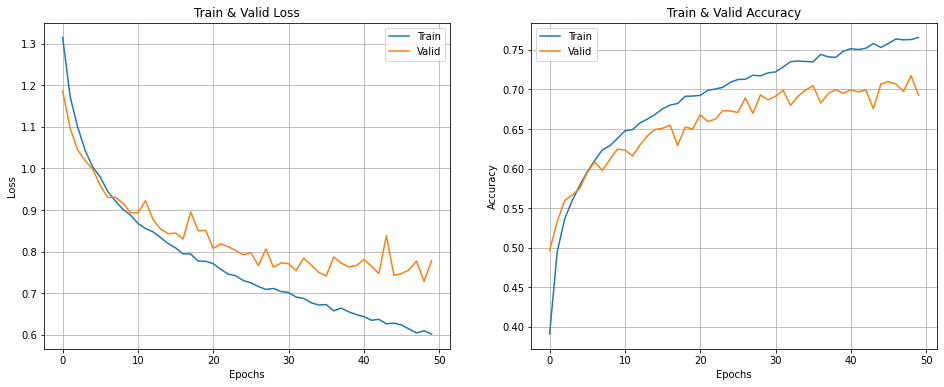

In [ ]:
draw_graph(hist_V)

In [ ]:
loss, acc_V = model_V.evaluate(valid_data)

print('\n* Loss')
print(f'==> {loss:.5f}')

print('\n* Accuracy')
print(f'==> {acc_V:.5f}')


49/49 [==============================] - 1s 29ms/step - loss: 0.7780 - accuracy: 0.6927

* Loss
==> 0.77803

* Accuracy
==> 0.69266


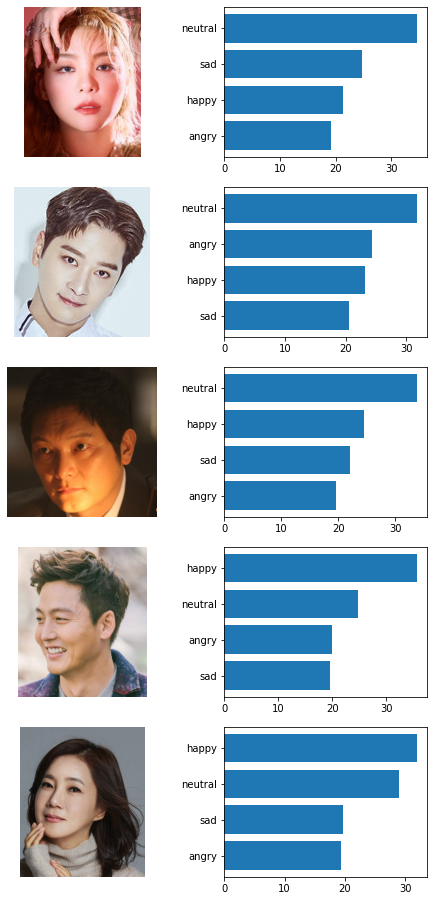

In [ ]:
evaluate_testdata(model_V)

## VGG19

### Modeling

In [ ]:
#import VGG19 
from keras.applications import VGG19

conv_base = VGG19(include_top = False,
                     #weights = 'imagenet',
                      input_shape = (48,48,3))

#model define
from keras import models, layers

#CNN-VGG19
model_V19 = models.Sequential()
model_V19.add(conv_base)

#DNN
model_V19.add(layers.Flatten())
model_V19.add(layers.Dense(256, activation = 'relu'))
model_V19.add(layers.Dropout(0.4))
model_V19.add(layers.Dense(4, activation = 'softmax'))


model_V19.summary()

80142336/80134624 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1028      
Total params: 20,156,740
Trainable params: 20,156,740
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##Model Compile
from keras import optimizers

model_V19.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00001),
              metrics = ['accuracy'])

In [ ]:
##Model fit : epoch 조절

%%time

hist_V19 = model_V19.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

Epoch 1/50
188/188 [==============================] - 21s 105ms/step - loss: 1.4133 - accuracy: 0.3224 - val_loss: 1.2450 - val_accuracy: 0.4387
Epoch 2/50
188/188 [==============================] - 19s 104ms/step - loss: 1.2269 - accuracy: 0.4487 - val_loss: 1.1598 - val_accuracy: 0.4975
Epoch 3/50
188/188 [==============================] - 19s 103ms/step - loss: 1.1509 - accuracy: 0.5022 - val_loss: 1.1312 - val_accuracy: 0.5047
Epoch 4/50
188/188 [==============================] - 19s 103ms/step - loss: 1.0755 - accuracy: 0.5434 - val_loss: 1.0081 - val_accuracy: 0.5844
Epoch 5/50
188/188 [==============================] - 19s 103ms/step - loss: 1.0272 - accuracy: 0.5658 - val_loss: 0.9930 - val_accuracy: 0.5697
Epoch 6/50
188/188 [==============================] - 19s 103ms/step - loss: 1.0008 - accuracy: 0.5839 - val_loss: 1.0107 - val_accuracy: 0.5697
Epoch 7/50
188/188 [==============================] - 19s 103ms/step - loss: 0.9730 - accuracy: 0.5948 - val_loss: 0.9402 - val_ac

### Evaluation

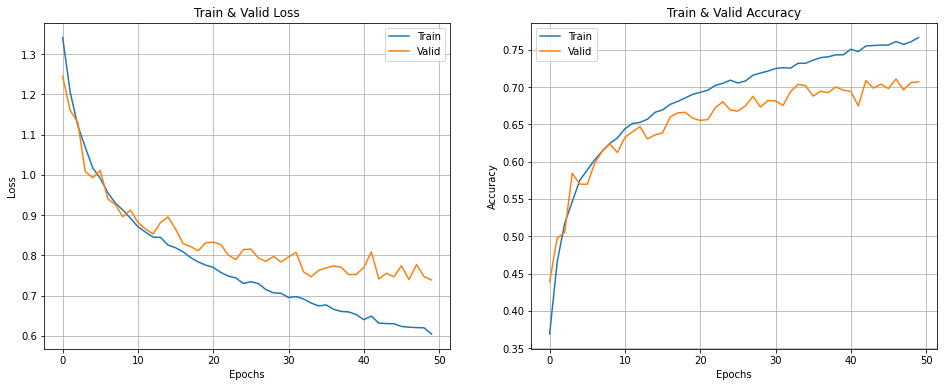

In [ ]:
draw_graph(hist_V19)

In [ ]:
loss, acc_V19 = model_V19.evaluate(valid_data)

print('\n* Loss')
print(f'==> {loss:.5f}')

print('\n* Accuracy')
print(f'==> {acc_V19:.5f}')


49/49 [==============================] - 1s 28ms/step - loss: 0.7389 - accuracy: 0.7069

* Loss
==> 0.73890

* Accuracy
==> 0.70689


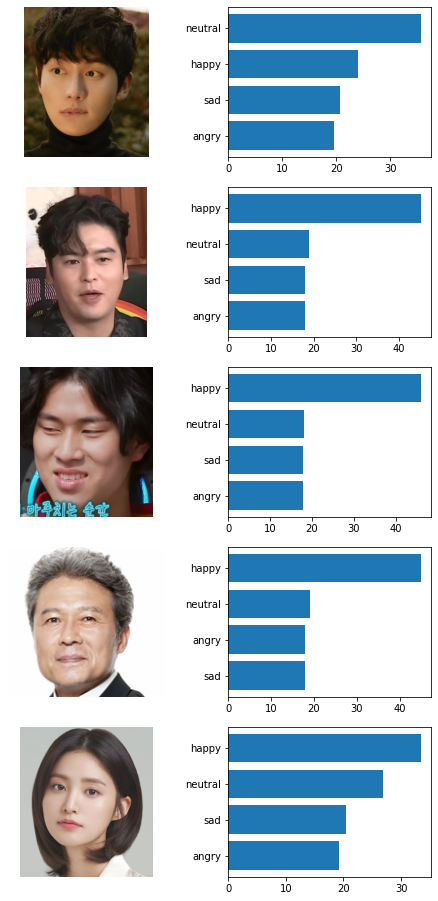

In [ ]:
evaluate_testdata(model_V19)

## ResNet50

### Modeling

In [ ]:
#import ResNet50
from keras.applications.resnet50 import ResNet50

conv_base = ResNet50(include_top = False,
                       input_shape = (48,48,3))

#model define
from keras import models, layers

#CNN-ResNet50
model_R = models.Sequential()
model_R.add(conv_base)

#DNN
model_R.add(layers.Flatten())
model_R.add(layers.Dense(256, activation = 'relu'))
model_R.add(layers.Dropout(0.4))
model_R.add(layers.Dense(4, activation = 'softmax'))


model_R.summary()

94773248/94765736 [==============================] - 2s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 1028      
Total params: 25,686,148
Trainable params: 25,633,028
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
##Model Compile
from keras import optimizers

model_R.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00001),
              metrics = ['accuracy'])

In [ ]:
##Model fit : epoch 조절

%%time

hist_R = model_R.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

Epoch 1/50
188/188 [==============================] - 27s 115ms/step - loss: 2.4392 - accuracy: 0.2673 - val_loss: 34.2982 - val_accuracy: 0.2376
Epoch 2/50
188/188 [==============================] - 20s 108ms/step - loss: 1.8463 - accuracy: 0.3258 - val_loss: 343.4498 - val_accuracy: 0.2184
Epoch 3/50
188/188 [==============================] - 21s 110ms/step - loss: 1.6156 - accuracy: 0.3512 - val_loss: 180.8879 - val_accuracy: 0.2195
Epoch 4/50
188/188 [==============================] - 20s 108ms/step - loss: 1.5007 - accuracy: 0.3609 - val_loss: 9.0548 - val_accuracy: 0.2397
Epoch 5/50
188/188 [==============================] - 20s 108ms/step - loss: 1.4178 - accuracy: 0.3778 - val_loss: 1.7562 - val_accuracy: 0.3228
Epoch 6/50
188/188 [==============================] - 20s 109ms/step - loss: 1.3600 - accuracy: 0.3880 - val_loss: 1.5627 - val_accuracy: 0.3808
Epoch 7/50
188/188 [==============================] - 21s 109ms/step - loss: 1.3333 - accuracy: 0.4015 - val_loss: 1.4274 - v

### Evaluation

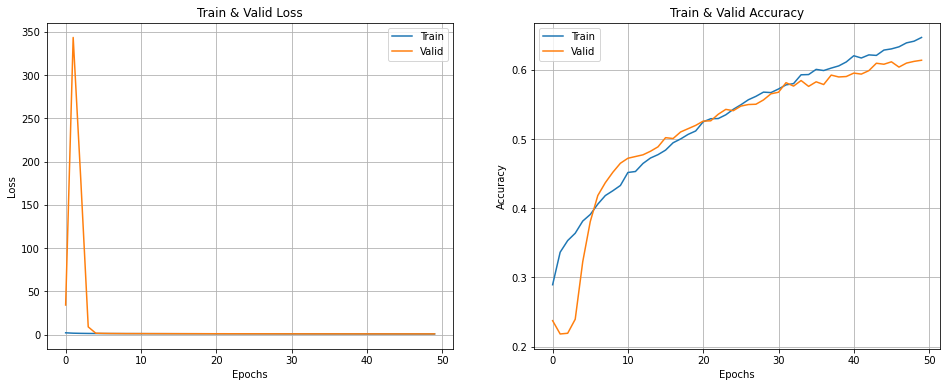

In [ ]:
draw_graph(hist_R)

In [ ]:
loss, acc_R = model_R.evaluate(valid_data)

print('\n* Loss')
print(f'==> {loss:.5f}')

print('\n* Accuracy')
print(f'==> {acc_R:.5f}')


49/49 [==============================] - 2s 32ms/step - loss: 0.9586 - accuracy: 0.6137

* Loss
==> 0.95862

* Accuracy
==> 0.61366


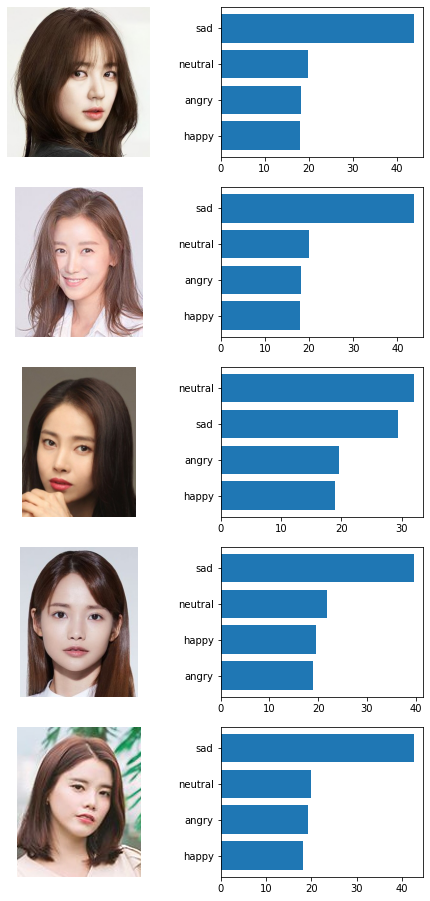

In [ ]:
evaluate_testdata(model_R)



## ResNet101

### Modeling

In [ ]:
#import ResNet101 
from keras.applications import ResNet101

conv_base = ResNet101(include_top = False,
                       input_shape = (48,48,3))

#model define
from keras import models, layers

#CNN-ResNet101
model_R101 = models.Sequential()
model_R101.add(conv_base)

#DNN
model_R101.add(layers.Flatten())
model_R101.add(layers.Dense(256, activation = 'relu'))
model_R101.add(layers.Dropout(0.4))
model_R101.add(layers.Dense(4, activation = 'softmax'))


model_R101.summary()

171450368/171446536 [==============================] - 8s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 2, 2, 2048)        42658176  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 1028      
Total params: 44,756,612
Trainable params: 44,651,268
Non-trainable params: 105,344
_________________________________________________________________


In [ ]:
##Model Compile
from keras import optimizers

model_R101.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00001),
              metrics = ['accuracy'])

In [ ]:
##Model fit : epoch 조절

%%time

hist_R101 = model_R101.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

Epoch 1/50
188/188 [==============================] - 34s 133ms/step - loss: 2.2376 - accuracy: 0.2873 - val_loss: 179.3178 - val_accuracy: 0.3575
Epoch 2/50
188/188 [==============================] - 23s 124ms/step - loss: 1.5412 - accuracy: 0.3160 - val_loss: 714.5132 - val_accuracy: 0.1865
Epoch 3/50
188/188 [==============================] - 23s 124ms/step - loss: 1.4075 - accuracy: 0.3345 - val_loss: 359.5094 - val_accuracy: 0.1933
Epoch 4/50
188/188 [==============================] - 23s 125ms/step - loss: 1.3495 - accuracy: 0.3572 - val_loss: 47.7760 - val_accuracy: 0.2677
Epoch 5/50
188/188 [==============================] - 23s 125ms/step - loss: 1.3255 - accuracy: 0.3750 - val_loss: 3.0320 - val_accuracy: 0.3443
Epoch 6/50
188/188 [==============================] - 23s 124ms/step - loss: 1.3068 - accuracy: 0.3870 - val_loss: 1.6630 - val_accuracy: 0.3733
Epoch 7/50
188/188 [==============================] - 24s 126ms/step - loss: 1.2920 - accuracy: 0.4003 - val_loss: 1.4463 -

### Evaluation

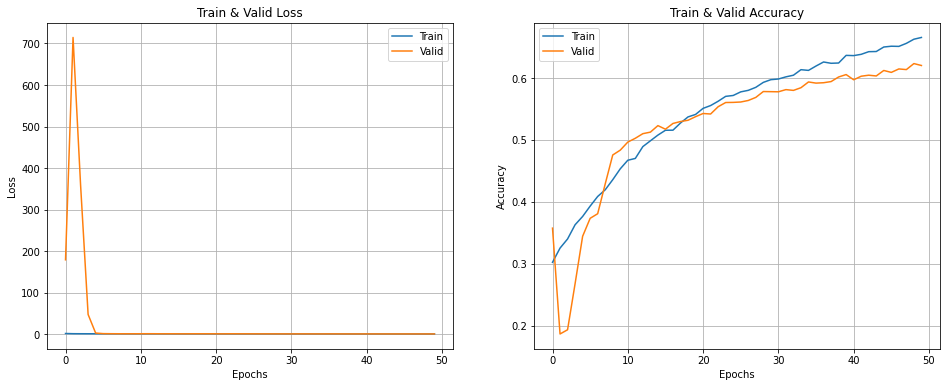

In [ ]:
draw_graph(hist_R101)

In [ ]:
loss, acc_R101 = model_R101.evaluate(valid_data)

print('\n* Loss')
print(f'==> {loss:.5f}')

print('\n* Accuracy')
print(f'==> {acc_R101:.5f}')


49/49 [==============================] - 2s 36ms/step - loss: 0.9241 - accuracy: 0.6203

* Loss
==> 0.92406

* Accuracy
==> 0.62026


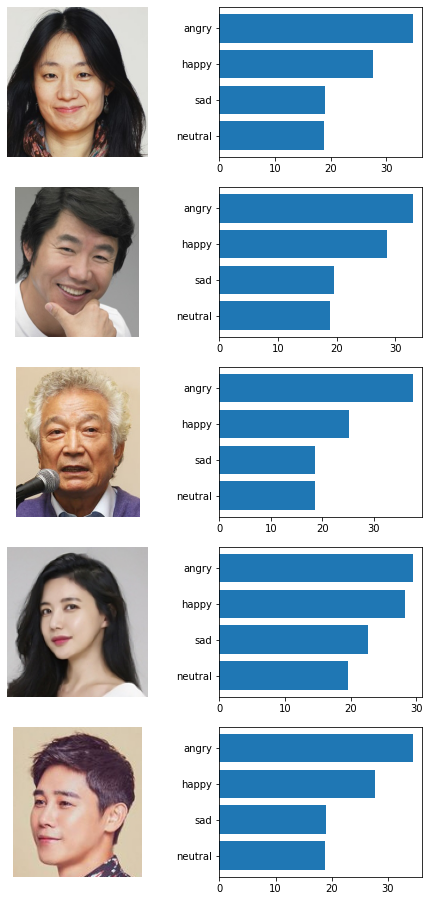

In [ ]:
evaluate_testdata(model_R101)



## ResNet152

### Modeling

In [ ]:
#import ResNet152 
from keras.applications import ResNet152

conv_base = ResNet152(include_top = False,
                       input_shape = (48,48,3))

#model define
from keras import models, layers

#CNN-ResNet152 
model_R152 = models.Sequential()
model_R152.add(conv_base)

#DNN
model_R152.add(layers.Flatten())
model_R152.add(layers.Dense(256, activation = 'relu'))
model_R152.add(layers.Dropout(0.4))
model_R152.add(layers.Dense(4, activation = 'softmax'))


model_R152.summary()

234700800/234698864 [==============================] - 10s 0us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 2, 2, 2048)        58370944  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 1028      
Total params: 60,469,380
Trainable params: 60,317,956
Non-trainable params: 151,424
_________________________________________________________________


In [ ]:
##Model Compile
from keras import optimizers

model_R152.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00001),
              metrics = ['accuracy'])

In [ ]:
##Model fit : epoch 조절

%%time

hist_R152 = model_R152.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

Epoch 1/50
188/188 [==============================] - 43s 153ms/step - loss: 2.1820 - accuracy: 0.2881 - val_loss: 3396.2148 - val_accuracy: 0.1865
Epoch 2/50
188/188 [==============================] - 26s 140ms/step - loss: 1.5038 - accuracy: 0.3210 - val_loss: 8442.1768 - val_accuracy: 0.1865
Epoch 3/50
188/188 [==============================] - 26s 138ms/step - loss: 1.4137 - accuracy: 0.3428 - val_loss: 2237.9626 - val_accuracy: 0.1869
Epoch 4/50
188/188 [==============================] - 26s 140ms/step - loss: 1.3805 - accuracy: 0.3407 - val_loss: 67.6430 - val_accuracy: 0.3197
Epoch 5/50
188/188 [==============================] - 26s 139ms/step - loss: 1.3374 - accuracy: 0.3730 - val_loss: 3.6714 - val_accuracy: 0.3259
Epoch 6/50
188/188 [==============================] - 26s 140ms/step - loss: 1.3255 - accuracy: 0.3806 - val_loss: 2.1635 - val_accuracy: 0.3789
Epoch 7/50
188/188 [==============================] - 26s 140ms/step - loss: 1.3059 - accuracy: 0.3846 - val_loss: 1.746

### Evaluation

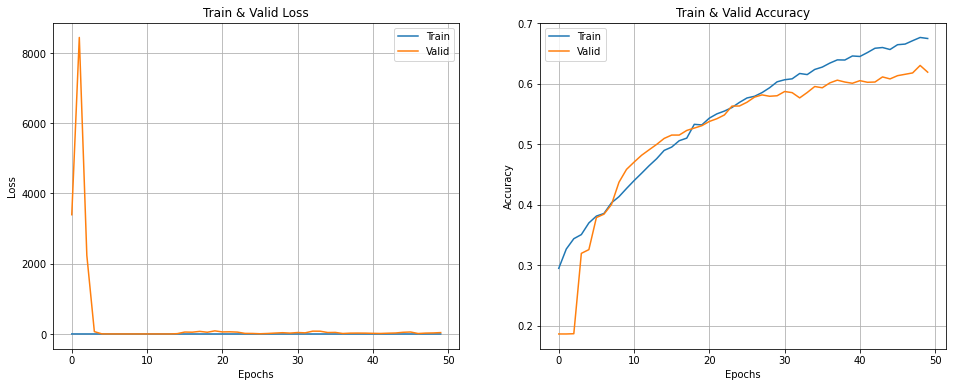

In [ ]:
draw_graph(hist_R152)

In [ ]:
loss, acc_R152 = model_R152.evaluate(valid_data)

print('\n* Loss')
print(f'==> {loss:.5f}')

print('\n* Accuracy')
print(f'==> {acc_R152:.5f}')


49/49 [==============================] - 2s 40ms/step - loss: 40.3158 - accuracy: 0.6192

* Loss
==> 40.31584

* Accuracy
==> 0.61922


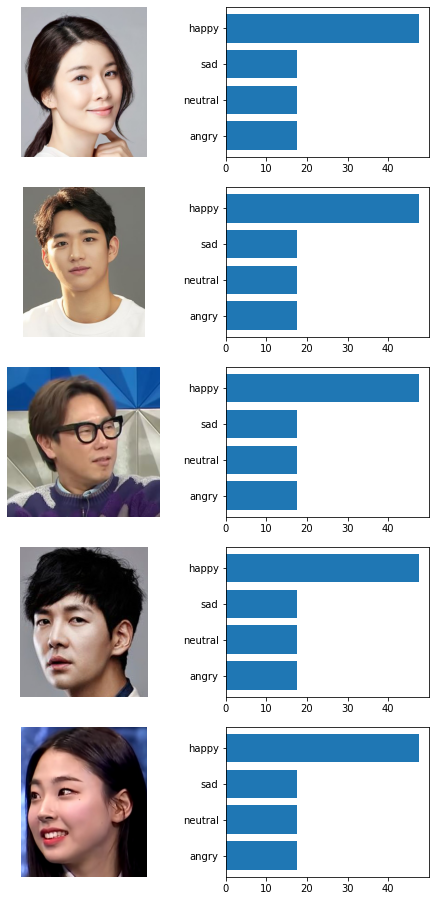

In [ ]:
evaluate_testdata(model_R152)

## ResNet50V2

### Modeling

In [ ]:
#import ResNet50V2
from keras.applications import ResNet50V2

conv_base = ResNet50V2(include_top = False,
                     #weights = 'imagenet',
                      input_shape = (48,48,3))

#model define
from keras import models, layers

#CNN-ResNet50V2
model_R50V2 = models.Sequential()
model_R50V2.add(conv_base)

#DNN
model_R50V2.add(layers.Flatten())
model_R50V2.add(layers.Dense(256, activation = 'relu'))
model_R50V2.add(layers.Dropout(0.4))
model_R50V2.add(layers.Dense(4, activation = 'softmax'))


model_R50V2.summary()

94674944/94668760 [==============================] - 1s 0us/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 2, 2, 2048)        23564800  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 1028      
Total params: 25,663,236
Trainable params: 25,617,796
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
##Model Compile
from keras import optimizers

model_R50V2.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00001),
              metrics = ['accuracy'])

In [ ]:
##Model fit : epoch 조절

%%time

hist_R50V2 = model_R50V2.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

Epoch 1/50
188/188 [==============================] - 26s 115ms/step - loss: 2.1076 - accuracy: 0.2920 - val_loss: 1.5123 - val_accuracy: 0.3168
Epoch 2/50
188/188 [==============================] - 20s 108ms/step - loss: 1.4734 - accuracy: 0.3104 - val_loss: 1.3614 - val_accuracy: 0.3544
Epoch 3/50
188/188 [==============================] - 20s 108ms/step - loss: 1.4019 - accuracy: 0.3230 - val_loss: 1.3519 - val_accuracy: 0.3610
Epoch 4/50
188/188 [==============================] - 20s 108ms/step - loss: 1.3783 - accuracy: 0.3460 - val_loss: 1.3359 - val_accuracy: 0.3680
Epoch 5/50
188/188 [==============================] - 20s 108ms/step - loss: 1.3545 - accuracy: 0.3644 - val_loss: 1.3258 - val_accuracy: 0.3665
Epoch 6/50
188/188 [==============================] - 20s 108ms/step - loss: 1.3419 - accuracy: 0.3651 - val_loss: 1.3147 - val_accuracy: 0.3785
Epoch 7/50
188/188 [==============================] - 20s 108ms/step - loss: 1.3144 - accuracy: 0.3760 - val_loss: 1.3019 - val_ac

### Evaluation

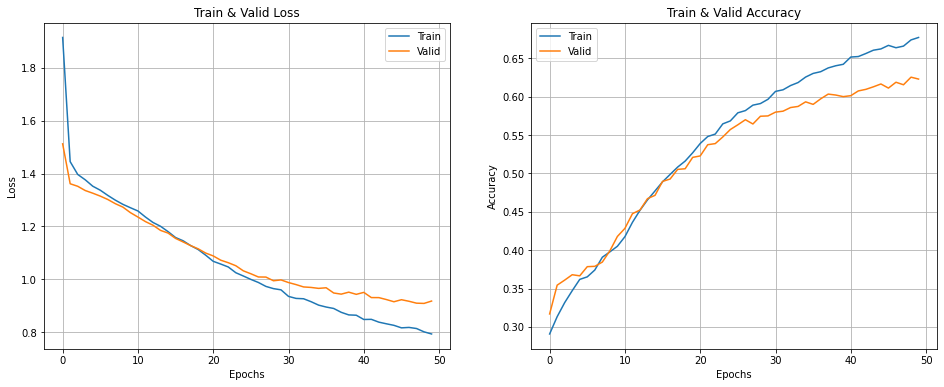

In [ ]:
draw_graph(hist_R50V2)

In [ ]:
loss, acc_R50V2 = model_R50V2.evaluate(valid_data)

print('\n* Loss')
print(f'==> {loss:.5f}')

print('\n* Accuracy')
print(f'==> {acc_R50V2:.5f}')


49/49 [==============================] - 2s 31ms/step - loss: 0.9182 - accuracy: 0.6231

* Loss
==> 0.91818

* Accuracy
==> 0.62314


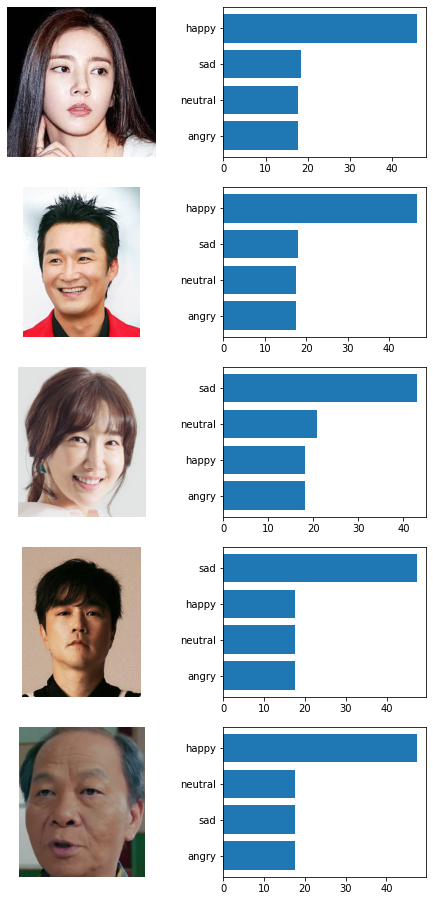

In [ ]:
evaluate_testdata(model_R50V2)



## ResNet101V2

### Modeling

In [ ]:
#import ResNet101V2
from keras.applications import ResNet101V2

conv_base = ResNet101V2(include_top = False,
                       input_shape = (48,48,3))

#model define
from keras import models, layers

#CNN-ResNet101V2
model_R101V2 = models.Sequential()
model_R101V2.add(conv_base)

#DNN
model_R101V2.add(layers.Flatten())
model_R101V2.add(layers.Dense(256, activation = 'relu'))
model_R101V2.add(layers.Dropout(0.4))
model_R101V2.add(layers.Dense(4, activation = 'softmax'))


model_R101V2.summary()

171319296/171317808 [==============================] - 1s 0us/step
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 2, 2, 2048)        42626560  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 1028      
Total params: 44,724,996
Trainable params: 44,627,332
Non-trainable params: 97,664
_________________________________________________________________


In [ ]:
##Model Compile
from keras import optimizers

model_R101V2.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00001),
              metrics = ['accuracy'])

In [ ]:
##Model fit : epoch 조절

%%time

hist_R101V2 = model_R101V2.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

Epoch 1/50
188/188 [==============================] - 33s 130ms/step - loss: 2.0986 - accuracy: 0.2775 - val_loss: 1.5105 - val_accuracy: 0.3292
Epoch 2/50
188/188 [==============================] - 23s 123ms/step - loss: 1.4977 - accuracy: 0.2947 - val_loss: 1.4272 - val_accuracy: 0.3259
Epoch 3/50
188/188 [==============================] - 23s 123ms/step - loss: 1.4052 - accuracy: 0.3319 - val_loss: 1.5027 - val_accuracy: 0.3467
Epoch 4/50
188/188 [==============================] - 23s 122ms/step - loss: 1.3892 - accuracy: 0.3444 - val_loss: 1.4034 - val_accuracy: 0.3552
Epoch 5/50
188/188 [==============================] - 23s 122ms/step - loss: 1.3710 - accuracy: 0.3456 - val_loss: 1.3342 - val_accuracy: 0.3589
Epoch 6/50
188/188 [==============================] - 23s 123ms/step - loss: 1.3442 - accuracy: 0.3623 - val_loss: 1.3321 - val_accuracy: 0.3587
Epoch 7/50
188/188 [==============================] - 23s 122ms/step - loss: 1.3248 - accuracy: 0.3590 - val_loss: 1.3188 - val_ac

### Evaluation

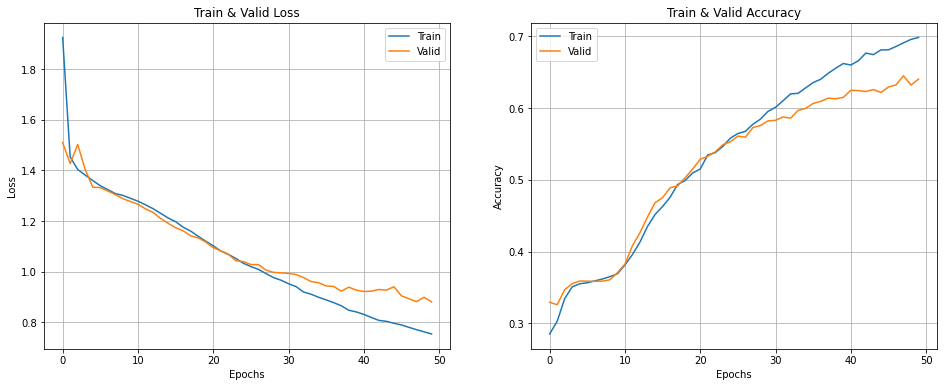

In [ ]:
draw_graph(hist_R101V2)

In [ ]:
loss, acc_R101V2 = model_R101V2.evaluate(valid_data)

print('\n* Loss')
print(f'==> {loss:.5f}')

print('\n* Accuracy')
print(f'==> {acc_R101V2:.5f}')


49/49 [==============================] - 2s 34ms/step - loss: 0.8812 - accuracy: 0.6405

* Loss
==> 0.88116

* Accuracy
==> 0.64047


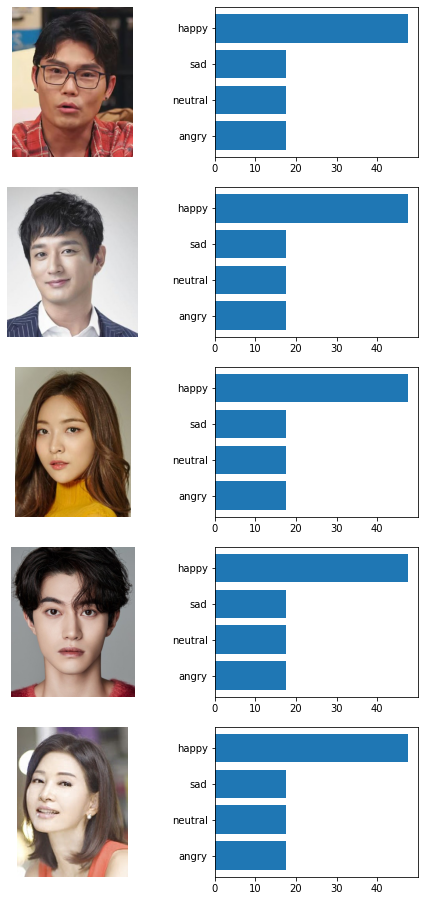

In [ ]:
evaluate_testdata(model_R101V2)



## ResNet152V2

### Modeling

In [ ]:
#import ResNet152V2
from keras.applications import ResNet152V2

conv_base = ResNet152V2(include_top = False,
                       input_shape = (48,48,3))

#model define
from keras import models, layers

#CNN-ResNet152V2
model_R152V2 = models.Sequential()
model_R152V2.add(conv_base)

#DNN
model_R152V2.add(layers.Flatten())
model_R152V2.add(layers.Dense(256, activation = 'relu'))
model_R152V2.add(layers.Dropout(0.4))
model_R152V2.add(layers.Dense(4, activation = 'softmax'))


model_R152V2.summary()

234553344/234545216 [==============================] - 8s 0us/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 2, 2, 2048)        58331648  
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 1028      
Total params: 60,430,084
Trainable params: 60,286,340
Non-trainable params: 143,744
_________________________________________________________________


In [ ]:
##Model Compile
from keras import optimizers

model_R152V2.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00001),
              metrics = ['accuracy'])

In [ ]:
##Model fit : epoch 조절

%%time

hist_R152V2 = model_R152V2.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

Epoch 1/50
188/188 [==============================] - 41s 148ms/step - loss: 1.8804 - accuracy: 0.2606 - val_loss: 1.4170 - val_accuracy: 0.2838
Epoch 2/50
188/188 [==============================] - 26s 137ms/step - loss: 1.5065 - accuracy: 0.2679 - val_loss: 1.4102 - val_accuracy: 0.3259
Epoch 3/50
188/188 [==============================] - 26s 137ms/step - loss: 1.4297 - accuracy: 0.3013 - val_loss: 1.3911 - val_accuracy: 0.3416
Epoch 4/50
188/188 [==============================] - 26s 138ms/step - loss: 1.3992 - accuracy: 0.3377 - val_loss: 1.3816 - val_accuracy: 0.3562
Epoch 5/50
188/188 [==============================] - 26s 137ms/step - loss: 1.3771 - accuracy: 0.3474 - val_loss: 1.3759 - val_accuracy: 0.3624
Epoch 6/50
188/188 [==============================] - 26s 139ms/step - loss: 1.3520 - accuracy: 0.3586 - val_loss: 1.3459 - val_accuracy: 0.3610
Epoch 7/50
188/188 [==============================] - 26s 139ms/step - loss: 1.3387 - accuracy: 0.3616 - val_loss: 1.3304 - val_ac

### Evaluation

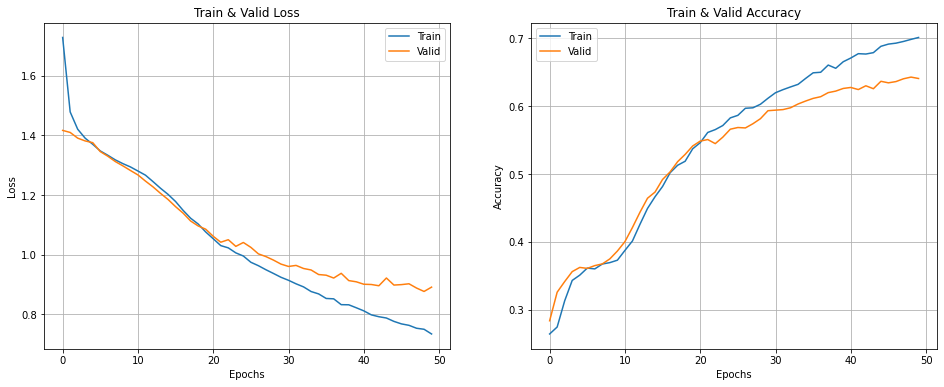

In [ ]:
draw_graph(hist_R152V2)

In [ ]:
loss, acc_R152V2 = model_R152V2.evaluate(valid_data)

print('\n* Loss')
print(f'==> {loss:.5f}')

print('\n* Accuracy')
print(f'==> {acc_R152V2:.5f}')


49/49 [==============================] - 2s 37ms/step - loss: 0.8911 - accuracy: 0.6407

* Loss
==> 0.89114

* Accuracy
==> 0.64068


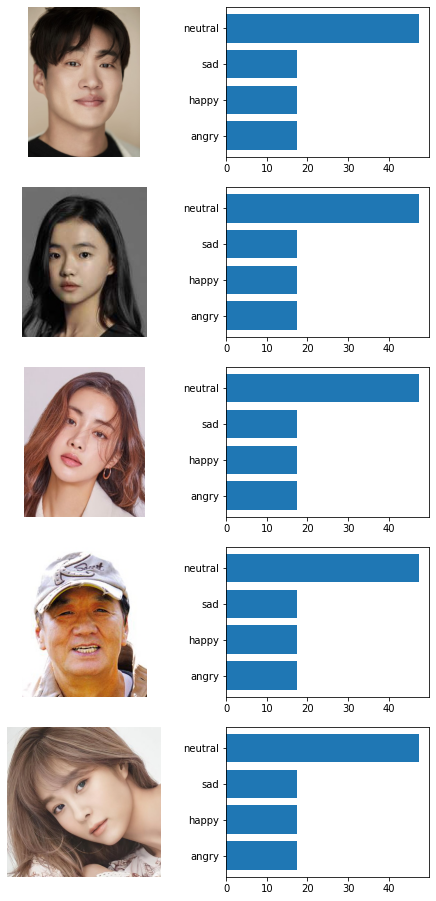

In [ ]:
evaluate_testdata(model_R152V2)



## DenseNet121

### Modeling

In [ ]:
#import DenseNet121
from keras.applications import DenseNet121

conv_base = DenseNet121(include_top = False,
                       input_shape = (48,48,3))

#model define
from keras import models, layers

#CNN-DenseNet121
model_D121 = models.Sequential()
model_D121.add(conv_base)

#DNN
model_D121.add(layers.Flatten())
model_D121.add(layers.Dense(256, activation = 'relu'))
model_D121.add(layers.Dropout(0.4))
model_D121.add(layers.Dense(4, activation = 'softmax'))


model_D121.summary()

29089792/29084464 [==============================] - 0s 0us/step
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 1028      
Total params: 7,300,932
Trainable params: 7,217,284
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
##Model Compile
from keras import optimizers

model_D121.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00001),
              metrics = ['accuracy'])

In [ ]:
##Model fit : epoch 조절

%%time

hist_D121 = model_D121.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

Epoch 1/50
188/188 [==============================] - 36s 138ms/step - loss: 1.9832 - accuracy: 0.2763 - val_loss: 1.4289 - val_accuracy: 0.3082
Epoch 2/50
188/188 [==============================] - 23s 124ms/step - loss: 1.7402 - accuracy: 0.3174 - val_loss: 1.4888 - val_accuracy: 0.3228
Epoch 3/50
188/188 [==============================] - 23s 125ms/step - loss: 1.6019 - accuracy: 0.3287 - val_loss: 1.4900 - val_accuracy: 0.3589
Epoch 4/50
188/188 [==============================] - 24s 125ms/step - loss: 1.5020 - accuracy: 0.3397 - val_loss: 1.3940 - val_accuracy: 0.3800
Epoch 5/50
188/188 [==============================] - 23s 124ms/step - loss: 1.4444 - accuracy: 0.3519 - val_loss: 1.3366 - val_accuracy: 0.3985
Epoch 6/50
188/188 [==============================] - 24s 125ms/step - loss: 1.3960 - accuracy: 0.3792 - val_loss: 1.3041 - val_accuracy: 0.4117
Epoch 7/50
188/188 [==============================] - 23s 124ms/step - loss: 1.3558 - accuracy: 0.3905 - val_loss: 1.2825 - val_ac

### Evaluation

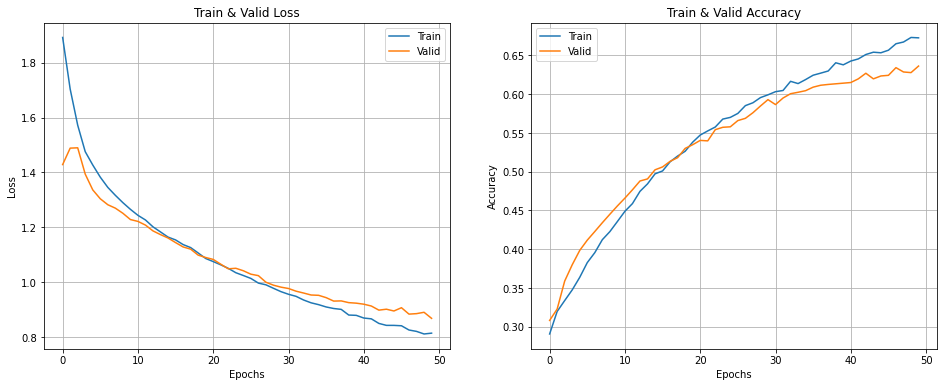

In [ ]:
draw_graph(hist_D121)

In [ ]:
loss, acc_D121 = model_D121.evaluate(valid_data)

print('\n* Loss')
print(f'==> {loss:.5f}')

print('\n* Accuracy')
print(f'==> {acc_D121:.5f}')


49/49 [==============================] - 2s 35ms/step - loss: 0.8683 - accuracy: 0.6363

* Loss
==> 0.86828

* Accuracy
==> 0.63634


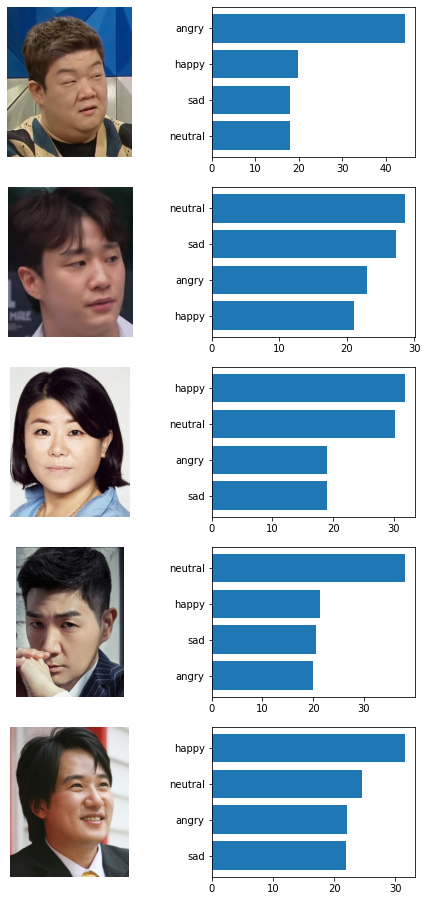

In [ ]:
evaluate_testdata(model_D121)



## DenseNet169

### Modeling

In [ ]:
#import DenseNet169
from keras.applications import DenseNet169

conv_base = DenseNet169(include_top = False,
                       input_shape = (48,48,3))

#model define
from keras import models, layers

#CNN-DenseNet169
model_D169 = models.Sequential()
model_D169.add(conv_base)

#DNN
model_D169.add(layers.Flatten())
model_D169.add(layers.Dense(256, activation = 'relu'))
model_D169.add(layers.Dropout(0.4))
model_D169.add(layers.Dense(4, activation = 'softmax'))


model_D169.summary()

51879936/51877672 [==============================] - 1s 0us/step
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Functional)     (None, 1, 1, 1664)        12642880  
_________________________________________________________________
flatten_10 (Flatten)         (None, 1664)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               426240    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 1028      
Total params: 13,070,148
Trainable params: 12,911,748
Non-trainable params: 158,400
_________________________________________________________________


In [ ]:
##Model Compile
from keras import optimizers

model_D169.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00001),
              metrics = ['accuracy'])

In [ ]:
##Model fit : epoch 조절

%%time

hist_D169 = model_D169.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

Epoch 1/50
188/188 [==============================] - 44s 153ms/step - loss: 1.6350 - accuracy: 0.2725 - val_loss: 1.3962 - val_accuracy: 0.2985
Epoch 2/50
188/188 [==============================] - 26s 137ms/step - loss: 1.4470 - accuracy: 0.3372 - val_loss: 1.3774 - val_accuracy: 0.3560
Epoch 3/50
188/188 [==============================] - 26s 138ms/step - loss: 1.3720 - accuracy: 0.3605 - val_loss: 1.3375 - val_accuracy: 0.3936
Epoch 4/50
188/188 [==============================] - 26s 137ms/step - loss: 1.3335 - accuracy: 0.3846 - val_loss: 1.2937 - val_accuracy: 0.4226
Epoch 5/50
188/188 [==============================] - 26s 138ms/step - loss: 1.3002 - accuracy: 0.4035 - val_loss: 1.2592 - val_accuracy: 0.4455
Epoch 6/50
188/188 [==============================] - 26s 137ms/step - loss: 1.2636 - accuracy: 0.4369 - val_loss: 1.2373 - val_accuracy: 0.4544
Epoch 7/50
188/188 [==============================] - 26s 137ms/step - loss: 1.2440 - accuracy: 0.4538 - val_loss: 1.2149 - val_ac

### Evaluation

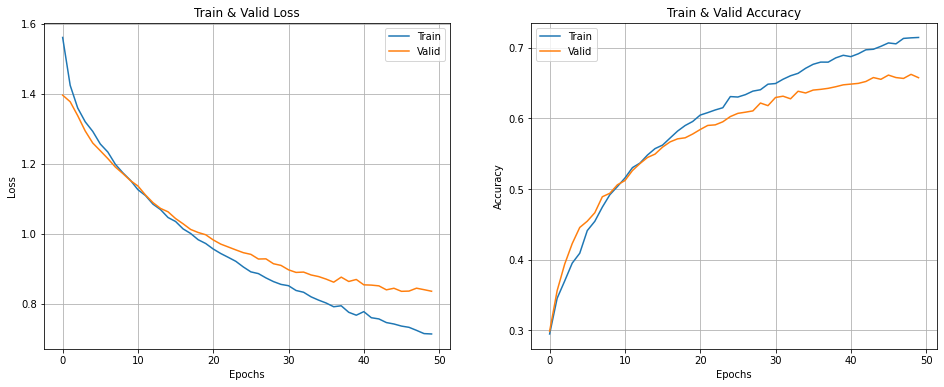

In [ ]:
draw_graph(hist_D169)

In [ ]:
loss, acc_D169 = model_D169.evaluate(valid_data)

print('\n* Loss')
print(f'==> {loss:.5f}')

print('\n* Accuracy')
print(f'==> {acc_D169:.5f}')


49/49 [==============================] - 2s 38ms/step - loss: 0.8354 - accuracy: 0.6578

* Loss
==> 0.83537

* Accuracy
==> 0.65780


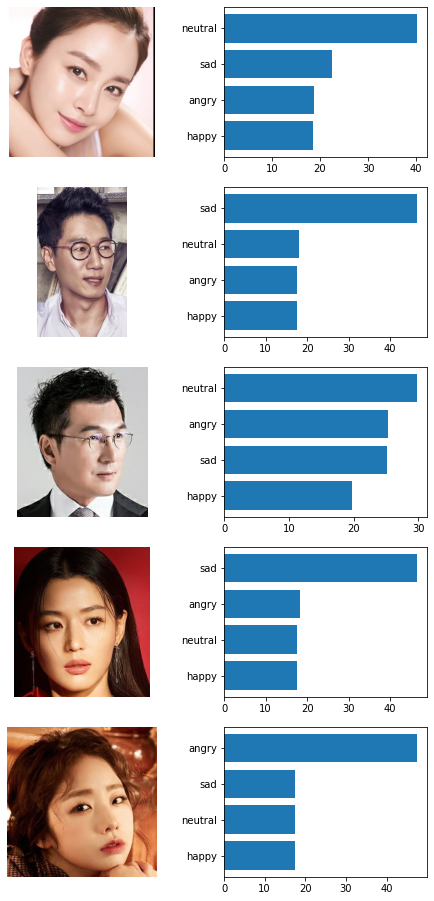

In [ ]:
evaluate_testdata(model_D169)



## DenseNet201

### Modeling

In [ ]:
#import DenseNet201
from keras.applications import DenseNet201

conv_base = DenseNet201(include_top = False,
                       input_shape = (48,48,3))

#model define
from keras import models, layers

#CNN-DenseNet201
model_D201 = models.Sequential()
model_D201.add(conv_base)

#DNN
model_D201.add(layers.Flatten())
model_D201.add(layers.Dense(256, activation = 'relu'))
model_D201.add(layers.Dropout(0.4))
model_D201.add(layers.Dense(4, activation = 'softmax'))


model_D201.summary()

74842112/74836368 [==============================] - 2s 0us/step
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 1, 1, 1920)        18321984  
_________________________________________________________________
flatten_11 (Flatten)         (None, 1920)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               491776    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 1028      
Total params: 18,814,788
Trainable params: 18,585,732
Non-trainable params: 229,056
_________________________________________________________________


In [ ]:
##Model Compile
from keras import optimizers

model_D201.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00001),
              metrics = ['accuracy'])

In [ ]:
##Model fit : epoch 조절

%%time

hist_D201 = model_D201.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

Epoch 1/50
188/188 [==============================] - 50s 169ms/step - loss: 1.5729 - accuracy: 0.2851 - val_loss: 1.3588 - val_accuracy: 0.3340
Epoch 2/50
188/188 [==============================] - 28s 150ms/step - loss: 1.4078 - accuracy: 0.3436 - val_loss: 1.3613 - val_accuracy: 0.3513
Epoch 3/50
188/188 [==============================] - 28s 150ms/step - loss: 1.3496 - accuracy: 0.3753 - val_loss: 1.3270 - val_accuracy: 0.3841
Epoch 4/50
188/188 [==============================] - 28s 149ms/step - loss: 1.3067 - accuracy: 0.3990 - val_loss: 1.2624 - val_accuracy: 0.4317
Epoch 5/50
188/188 [==============================] - 28s 151ms/step - loss: 1.2713 - accuracy: 0.4284 - val_loss: 1.2363 - val_accuracy: 0.4528
Epoch 6/50
188/188 [==============================] - 28s 149ms/step - loss: 1.2391 - accuracy: 0.4452 - val_loss: 1.2218 - val_accuracy: 0.4608
Epoch 7/50
188/188 [==============================] - 28s 150ms/step - loss: 1.2097 - accuracy: 0.4642 - val_loss: 1.1856 - val_ac

### Evaluation

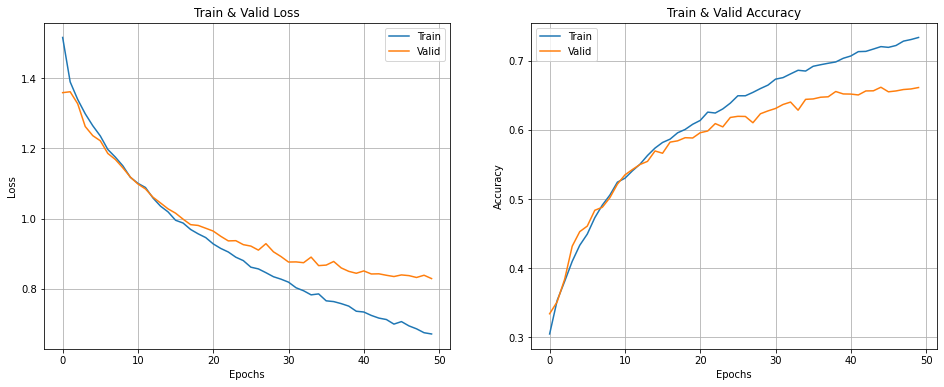

In [ ]:
draw_graph(hist_D201)

In [ ]:
loss, acc_D201 = model_D201.evaluate(valid_data)

print('\n* Loss')
print(f'==> {loss:.5f}')

print('\n* Accuracy')
print(f'==> {acc_D201:.5f}')


49/49 [==============================] - 2s 41ms/step - loss: 0.8294 - accuracy: 0.6613

* Loss
==> 0.82935

* Accuracy
==> 0.66130


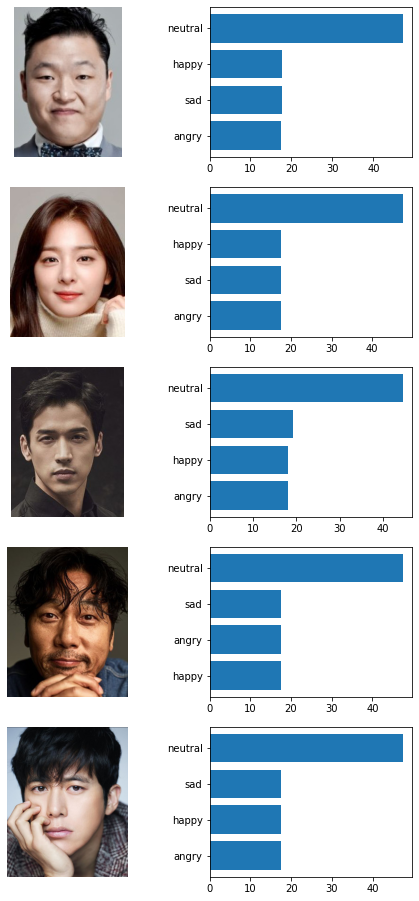

In [ ]:
evaluate_testdata(model_D201)

## Result


In [ ]:
import pandas as pd

result = pd.DataFrame(data = {'Name' : ['VGG16','VGG19','ResNet50','ResNet101','ResNet152','ResNet50V2','ResNet101V2','ResNet152V2','DenseNet121','DenseNet169','DenseNet201'],
                              'Accuracy' : [acc_V, acc_V19, acc_R, acc_R101, acc_R152, acc_R50V2, acc_R101V2, acc_R152V2, acc_D121, acc_D169, acc_D201]})

result = result.sort_values(by = ['Accuracy'], ascending = False)
result

,Name,Accuracy
1,VGG19,0.706889
0,VGG16,0.692657
10,DenseNet201,0.661304
9,DenseNet169,0.657797
7,ResNet152V2,0.640677
6,ResNet101V2,0.640470
8,DenseNet121,0.636345
5,ResNet50V2,0.623144
3,ResNet101,0.620256
4,ResNet152,0.619224


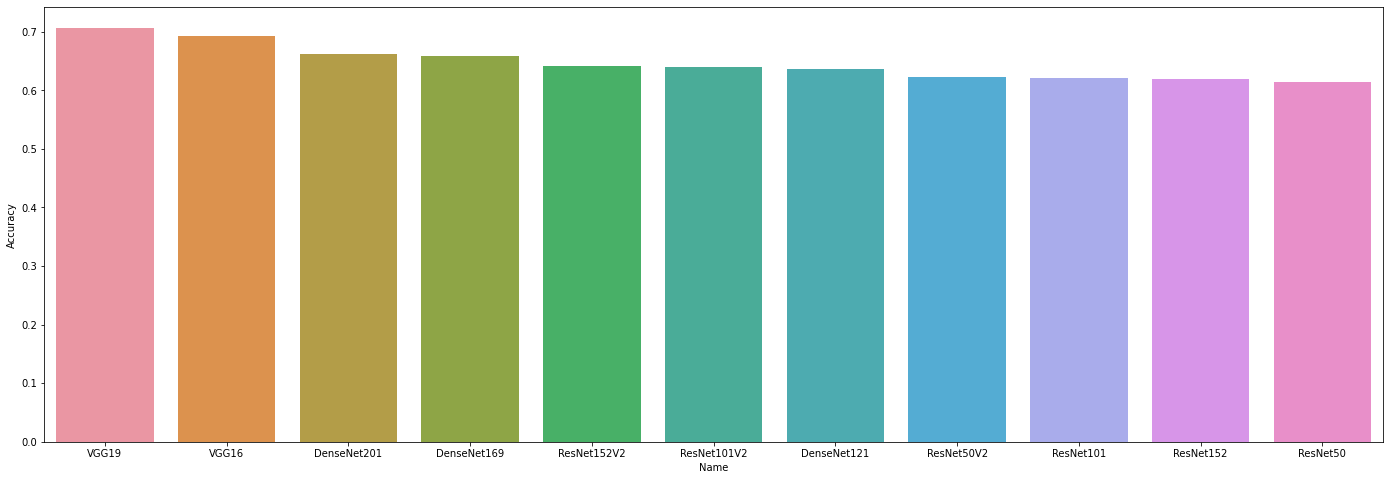

In [ ]:
#Accuracy 순위대로 표시
import seaborn as sns

plt.figure(figsize = (24,8))
sns.barplot(data = result, x = 'Name', y = 'Accuracy')

plt.show()